In [9]:
#import STRUTfuncs

In [1]:
from __future__ import division
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import graphlab
%load_ext line_profiler

A newer version of GraphLab Create (v2.1) is available! Your current version is v2.0.1.
You can use pip to upgrade the graphlab-create package. For more information see https://turi.com/products/create/upgrade.
[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1470408645.log


This non-commercial license of GraphLab Create for academic use is assigned to llonini@ricres.org and will expire on November 11, 2016.


In [2]:
HealthyData = graphlab.SFrame.read_csv('../Datasets/Cbrace/HealthyData.csv')
CBRData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientCBRData.csv')
SCOData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientSCOData.csv')

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 100 lines in 0.338211 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 8375 lines in 0.541197 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 100 lines in 0.821949 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 22354 lines in 1.45867 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 100 lines in 1.02247 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 18762 lines in 1.01648 secs.

In [3]:
CBRData.head(5)

Columns:
	SubjID	int
	Session	int
	Features_  1	float
	Features_  2	float
	Features_  3	float
	Features_  4	int
	Features_  5	int
	Features_  6	int
	Features_  7	int
	Features_  8	float
	Features_  9	float
	Features_ 10	float
	Features_ 11	float
	Features_ 12	float
	Features_ 13	float
	Features_ 14	float
	Features_ 15	float
	Features_ 16	float
	Features_ 17	float
	Features_ 18	int
	Features_ 19	int
	Features_ 20	int
	Features_ 21	int
	Features_ 22	float
	Features_ 23	float
	Features_ 24	float
	Features_ 25	float
	Features_ 26	float
	Features_ 27	float
	Features_ 28	float
	Features_ 29	float
	Features_ 30	float
	Features_ 31	float
	Features_ 32	int
	Features_ 33	int
	Features_ 34	int
	Features_ 35	int
	Features_ 36	float
	Features_ 37	float
	Features_ 38	float
	Features_ 39	float
	Features_ 40	float
	Features_ 41	float
	Features_ 42	float
	Features_ 43	float
	Features_ 44	float
	Features_ 45	float
	Features_ 46	float
	Features_ 47	float
	Features_ 48	float
	Features_ 49	float
	Features_ 50	float
	Features_ 51	float
	Features_ 52	float
	Features_ 53	float
	Features_ 54	float
	Features_ 55	float
	Features_ 56	float
	Features_ 57	float
	Features_ 58	float
	Features_ 59	float
	Features_ 60	float
	Features_ 61	float
	Features_ 62	float
	Features_ 63	float
	Features_ 64	float
	Features_ 65	float
	Features_ 66	float
	Features_ 67	float
	Features_ 68	float
	Features_ 69	float
	Features_ 70	float
	Features_ 71	float
	Features_ 72	float
	Features_ 73	float
	Features_ 74	float
	Features_ 75	float
	Features_ 76	float
	Features_ 77	float
	Features_ 78	float
	Features_ 79	float
	Features_ 80	float
	Features_ 81	float
	Features_ 82	float
	Features_ 83	float
	Features_ 84	float
	Features_ 85	float
	Features_ 86	float
	Features_ 87	float
	Features_ 88	float
	Features_ 89	float
	Features_ 90	float
	Features_ 91	float
	Features_ 92	float
	Features_ 93	float
	Features_ 94	float
	Features_ 95	float
	Features_ 96	float
	Features_ 97	float
	Features_ 98	float
	Features_ 99	float
	Features_100	float
	Features_101	float
	Features_102	float
	Features_103	float
	Features_104	float
	Features_105	float
	Features_106	float
	Features_107	float
	Features_108	float
	Features_109	float
	Features_110	float
	Features_111	float
	Features_112	float
	Features_113	float
	Features_114	float
	Features_115	float
	Features_116	float
	Features_117	float
	Features_118	float
	Features_119	float
	Features_120	float
	Features_121	float
	Features_122	float
	Features_123	float
	Features_124	float
	Features_125	float
	Features_126	float
	Features_127	float
	Features_128	float
	Features_129	float
	Features_130	float
	Features_131	float
	Label	int

Rows: 5

Data:
+--------+---------+-----------------+--------------+--------------+--------------+
| SubjID | Session |   Features_  1  | Features_  2 | Features_  3 | Features_  4 |
+--------+---------+-----------------+--------------+--------------+--------------+
|   1    |    1    |  0.051382320442 |    0.6076    |    0.196     |      0       |
|   1    |    1    | 0.0253933701657 |    0.6076    |    0.1176    |      0       |
|   1    |    1    | 0.0248519337017 |     0.49     |    0.1176    |      0       |
|   1    |    1    | 0.0465635359116 |    0.3136    |    0.0784    |      0       |
|   1    |    1    | 0.0781834254144 |    0.2352    |    0.0784    |      56      |
+--------+---------+-----------------+--------------+--------------+--------------+
+--------------+--------------+--------------+-----------------+-----------------+
| Features_  5 | Features_  6 | Features_  7 |   Features_  8  |   Features_  9  |
+--------------+--------------+--------------+-----------------+-----------------+
|     181      |      0       |      0       |  0.112454267826 | -0.294668590342 |
|     178      |      3       |      0       | 0.0983200079119 | 0.0523105353163 |
|     181      |      0       |      0       | 0.0841222692085 | -0.592549758023 |
|     181      |      0       |      0       | 0.0654386480834 |  -1.01056633159 |
|     

In [4]:
#SUBJECTS IN THE DATABASE
HealthyCodes = HealthyData['SubjID'].unique()
HealthyCodes = HealthyCodes.sort()
print HealthyCodes
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
print PatientCodes

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[1, 2, 5, 6, 8, 11, 12, 13, 14, 15, 16, 19]


### STRUT Fcns


In [106]:
import numpy as np
import math
from math import log
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def convert_from_scikit_learn_to_dic_ite_strut(node_index,is_leaves, children_left,children_right,feature,threshold,value,labels,C):
        
        a = is_leaves[0]
        b = feature[0]
        c = threshold[0]
        if (a):
            d = value[0]  #datapoints of each class in the node
            d2 = np.squeeze(d/np.sum(d))
            d3 = np.zeros(C)
            d3[labels] = d2
            e = labels[np.argmax(d2)]
            return {'splitting_feature' : None,
            'left' : None,
            'right' : None,
            'is_leaf': True,
            'prediction': e,
            'labels_distribution':d3}
    
        else:
            left = children_left[0]-node_index[0]
            if(left==-1):
                left_tree = None
            else:
                left_tree = convert_from_scikit_learn_to_dic_ite_strut(node_index[left:],is_leaves[left:], children_left[left:],children_right[left:],feature[left:],threshold[left:],value[left:],labels,C)
            right = children_right[0]-node_index[0]
            if(right==-1):
                right_tree = None
            else:
                right_tree = convert_from_scikit_learn_to_dic_ite_strut(node_index[right:],is_leaves[right:], children_left[right:],children_right[right:],feature[right:],threshold[right:],value[right:],labels,C)
            return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': b,
            'threshold'        : c,
            'left'             : left_tree, 
            'right'            : right_tree,
            'labels_distribution': None}

def convert_from_scikit_learn_to_dic_strut(feature,threshold,C,Q,children_left,children_right):
    # C is the size of the whole labels
    # labels are the labels that are used in the this tree
    labels = range(0,C,1)
    n_nodes = len(children_left)
    node_index = np.array(range(0,n_nodes))
    Val = Q   #datapoints in node
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
    # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
            
    return convert_from_scikit_learn_to_dic_ite_strut(node_index,is_leaves, children_left,children_right,feature,threshold,Val,labels,C)

def treesubset(subset,children_left,children_right):
    ch_left = np.zeros(len(children_left))
    ch_right = np.zeros(len(children_right))  
    for i in range(len(subset)):
        (l,) = np.where(subset==children_left[i])
        (r,) = np.where(subset==children_right[i])
        if(l.shape[0]==0):
            ch_left[i] = -1
        else:
            ch_left[i] = l
            
        if(r.shape[0]==0):
            ch_right[i] = -1
        else:
            ch_right[i] = r        
    return (ch_left,ch_right)

def kl (p,q): # Kullback-libler divegence
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    return np.sum(np.where(p != 0,p * np.log10((p / q)), 0))

def jsd(p,q): # Symmetric Kullback-libler divergence
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    m = (p+q)/2
    return (kl(p,m)+kl(m,q))/2

def infogain(yleft,len_left,yright,len_right):
    N = len_left+len_right
    yparent = (len_left/N)*yleft+(len_right/N)*yright
    #compute information gain
    I = entropy(yparent) -( (len_left/N)*entropy(yleft) + (len_right/N)*entropy(yright) )   
    return I

#entropy for multiple classes
def entropy(y):
    y1 = y[y!=0]
    H = -(y1*np.log10(y1)).sum()
    return H 

#computes split for given feature
def partition(Xtarget,ytarget,index_of_data,feature,num_class_target,index_class_target,threshold): # divide the data to the left and rightbased on the threshold
    left = index_of_data[Xtarget[index_of_data,feature]<threshold]
    if(len(left)==0):
        left = index_of_data[Xtarget[index_of_data,feature]<=threshold]
    labels_left = ytarget[left]
    right = index_of_data[Xtarget[index_of_data,feature]>=threshold]
    labels_right = ytarget[right]
    
    qL_full = np.bincount(labels_left)
    qR_full = np.bincount(labels_right)
    qL_full = np.append(qL_full,np.zeros(np.max([num_class_target-qL_full.shape[0],0])))
    qR_full = np.append(qR_full,np.zeros(np.max([num_class_target-qR_full.shape[0],0])))
    
    qL = qL_full[index_class_target]
    qR = qR_full[index_class_target]
 
    qL = qL/qL.sum()
    qR = qR/qR.sum()
    
    return [qL,left,qR,right]

def dg(Sleft,lenleft,Sright,lenright,QL,QR): # DG function as in the paper    
    return 1-(lenleft/(lenleft+lenright))*jsd(Sleft,QL)-(lenright/(lenleft+lenright))*jsd(Sright,QR)
    
#optimize threshold of given node based on target data
#INPUTS: Xtarget, ytarget, S:indices of datapoints that reach node, f:feature of node, QL,QR:Distributions from source reaching children
#        C:# of classes, verbos: print additional info
#OUTPUTS: [th, ql, qr, left, right]: th: new threshold; ql,qr: distribution from target with new threshold; left,right: target data indices
#         going to left and right nodes
#Depending fcns: partition(), df(), infogain(), jsd(), kl(), entropy()

def threshold_selection(X,y,S,f,QL,QR,num_class_target,index_class_target,verbos): # finding the best threshold
    fvals = np.sort(X[S,f])
    num_data_points = len(fvals)
    N = 50 # # of bins to search threshold
    Val_DG  = np.array([]) #contains values of DG for each bin
    Val_infogain = np.array([])
    if num_data_points > N-1: 
        I = range(0,num_data_points,np.floor(num_data_points/N).astype(int))
        fvals = fvals[I[1:-1]]
    for i in fvals:
        [qL, left, qR, right] = partition(X,y,S,f,num_class_target,index_class_target,i) #compute histogram (qL,qR) for left and right children with current threshold
        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
        #ax1.plot(QL)
        #ax1.set_title('QL')
        #ax2.plot(Sleft, color='r')
        #ax2.set_title('QprimeL')
        #ax3.plot(QR)
        #ax3.set_title('QR')
        #ax4.plot(Sright, color='r')
        #ax4.set_title('QprimeR')
        Val_DG = np.append(Val_DG,dg(qL,len(left),qR,len(right),QL,QR))
        Val_infogain = np.append(Val_infogain,infogain(qL,len(left),qR,len(right)))        #Val_swap = np.append(Val_swap,dg(Sleft,len(left),Sright,len(right),QR,QL)) # this is the divergence measure for each threshold split  
    if(verbos):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row')
    #ax1.plot(Val)
    #ax1.set_title('DG')
    #ax2.plot(Val_infogain)
    #ax2.set_title('infogain')
        ax1.plot(fvals,Val_DG,'r')
        ax1.hold(True)
        ax1.plot(fvals,Val_infogain)
        ax1.hold(False)
        ax1.set_title('DG and Infogain')
    #plt.show()
    #find nan and assign the minimum value found in the array to remove the nan 
    Val_DG[np.isnan(Val_DG)] = min(Val_DG[~np.isnan(Val_DG)])
    Val_infogain[np.isnan(Val_infogain)] = min(Val_infogain[~np.isnan(Val_infogain)])
    #Val_swap[np.isnan(Val_swap)] = min(Val_swap[~np.isnan(Val_swap)])
    th_DG = fvals[np.argmax(Val_DG)]
    th_infogain = fvals[np.argmax(Val_infogain)]

    #plt.plot(Val_infogain)
    #plt.show()
    
    #find new threshold based on how many datapoints we have in current node
    #Set DG vs IG
    if(len(S)>0):
        [ql, left, qr, right] = partition(X,y,S,f,num_class_target,index_class_target,th_infogain)
        th = th_infogain
    else:
        [ql, left, qr, right] = partition(X,y,S,f,num_class_target,index_class_target,th_DG)
        th = th_DG
        
    if(verbos):
        ax2.plot(ql)
        ax2.hold(True)
        ax2.plot(qr)
        ax2.hold(False)
        ax2.set_title('Dist Target Data')

        ax3.plot(QL)
        ax3.hold(True)
        ax3.plot(QR)
        ax3.hold(False)
        ax3.set_title('Dist Source Data')
        
    return [th, ql, qr, left, right]

def classify(tree, x):   
    # if the node is a leaf node.
    if tree['is_leaf']:
        return tree['labels_distribution'] 
    else:
        # split on feature.
        val_split_feature = x[tree['splitting_feature']]
        if val_split_feature < tree['threshold']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'],x)

def forest_posterior(RF,x):

    T = len(RF)  #the number of trees 

    #infer the number of classes
    P0 = classify(RF[0],x)
    C = len(P0)
    
    Pt = np.zeros((T,C)) #matrix of posteriors from each tree (T x Nclasses)
    Pt[0,:] = P0
    for t in range(len(RF))[1:]:
        Pt[t,:] = classify(RF[t],x) 
    return Pt

#classify input based on majority voting of each tree prediction
def forest_classify_majority(RF,x):
        Pt = forest_posterior(RF,x)
        Yt = np.argmax(Pt,axis=1)         
        C,unique_counts = np.unique(Yt,return_counts=True) #the id of classes and number of each
        return C[np.argmax(unique_counts)]   
    
#classify input by averaging posteriors 
def forest_classify_ensemble(RF,x):
    Pt = forest_posterior(RF,x)
    Pforest = Pt.mean(axis=0)
    ypred = np.argmax(Pt.mean(axis=0))
    return ypred

def evaluate_classification_error(RF, X, y, method = None):  
    # Apply the forest_classify(RF, x) to each row in your data
    if method == None:
        ypred = map(lambda x: forest_classify_ensemble(RF,x), X)
        # Once you've made the predictions, calculate the classification error and return it
        mistakes = sum(ypred != y)
        error = mistakes/len(y)
    return error

#returning the histogram of the classes for each node in estimator. N is # of classes
def value_for_all(estimator,N):
    from scipy.sparse import csr_matrix
    ch_left = estimator.tree_.children_left
    ch_right = estimator.tree_.children_right
    (cl,) = np.where(ch_left!=-1)
    (cr,) = np.where(ch_right!=-1)
    cap = estimator.tree_.capacity
    dis_node = np.zeros((cap,estimator.tree_.n_classes))
    A = np.zeros([cap,cap])
    D = A
    A = csr_matrix(A)
    A[cl,ch_left[cl]] = 1
    A[cr,ch_right[cr]] = 1
    B = A
    C = B
    while(C.sum()!=0):
        C = A*C
        B = B + C
    I,J = B.nonzero()
    D[I,J] = 1
    (I,) = np.where(ch_left==-1)
    dis_node[I,:] = np.squeeze(estimator.tree_.value[I])
    for i in I:
        dis_node[i,:] = dis_node[i,:]/dis_node[i,:].sum()
    (remain1,) = np.where(ch_left!=-1)
    for i in remain1:
        (I,) = np.where(D[i,:]==1)
        dis_node[i,:] = np.sum(np.squeeze(estimator.tree_.value[I]),axis = 0)
        dis_node[i,:] = dis_node[i,:]/dis_node[i,:].sum()
    Dis_node = np.zeros((cap,N))
    Dis_node[:,estimator.classes_.astype(int)] = dis_node
    return Dis_node
    
def STRUT(Xsource,ysource,Xtarget,ytarget,n_trees,verbos = False):
    # Assumption: ysource has all the labels of the problem 
    
    #Train RF on Source
    Estimator = RandomForestClassifier(n_estimators=n_trees,criterion='entropy',random_state=0)  
    Estimator = Estimator.fit(Xsource, ysource)
    #Infer classes of source and target
    C = len(np.unique(ysource)) # Number of classes in source data
    index_class_target = np.sort(np.unique(ytarget)) #the indices of classes in the target data
    max_index_target = max(index_class_target)+1

    # ypred = Estimator.predict(Xtarget)
    # print sum(ypred!=ytarget)/len(ytarget)
   
    RF = []
    
    # Looping through all the trees in the forest RF
    for rf in range(Estimator.n_estimators):
        estimator = Estimator.estimators_[rf] 
        #print '#leaves before STRUT = %s'%(estimator.tree_.node_count)

        dis_node = value_for_all(estimator,C)  #Histogram of classes for source (row: node index, col: class)
        
        #if the target data contains a different # of classes than source
        if len(index_class_target) < C:
            dis_node = dis_node[:,index_class_target]/np.sum(dis_node[:,index_class_target],axis=1)[:,None]
        dis_node[np.isnan(dis_node)] = 1/len(index_class_target)
        #if(np.any(np.isnan(dis_node))):
         #   print 'nan found'    
            
        LF = estimator.tree_.children_left  #indices of left nodes 
        LR = estimator.tree_.children_right #indices of right nodes
        Features = estimator.tree_.feature
        num_nodes = estimator.tree_.capacity
        P = list(np.zeros(num_nodes)) #maintain a list of the target data indices at each node (0 is root) - capacity is node_count
        P[0] = range(len(ytarget))
        Q = np.zeros((num_nodes,len(index_class_target))) #Histogram of target data indices at each node
        Q[0,:] = dis_node[0,:]
        thresh = np.zeros(num_nodes) #init vector with new threshold at each node
        remain = [0]    #indexing the remaining nodes as we move from top-down
        subset = []     #maintains a list of the nodes that are reached from target data
        #looping through the nodes
        while(len(remain)!=0):
            i = remain[0]
            subset.append(i)  #updating the list of nodes reached by target data with current node index
            index_left = LF[i] 
            index_right = LR[i]
            #check if node is leaf
            if(index_left!=-1):
                QL = dis_node[index_left,:]  #distribution of labels in children nodes
                QR = dis_node[index_right,:]
                f = Features[i]  #feature of parent node
                [th, ql, qr, left, right] = threshold_selection(Xtarget,ytarget,np.array(P[i]),f,QL,QR,max_index_target,index_class_target,verbos)
                thresh[i] = th
                P[index_left] = left
                P[index_right] = right
                Q[index_left,:] = ql
                Q[index_right,:] = qr
                
                #if no target datapoints reach either the left or right children we make the parent node a leaf
                if(len(left)>0 and len(right)>0):
                    remain = np.append(remain,index_left)
                    remain = np.append(remain,index_right)
            remain = remain[1:]

        subset = np.sort(subset)
        lf =  LF[subset]
        lr =  LR[subset]
        (ch_lf,ch_lr) = treesubset(subset,lf,lr)
        Qnew = np.zeros((Q.shape[0],C))
        Qnew[:,index_class_target] = Q  #Histogram of target data on the full set of class labels (includes the missing classes)
        ST = convert_from_scikit_learn_to_dic_strut(Features[subset],thresh[subset],C,Qnew[subset,:],ch_lf.astype(int),ch_lr.astype(int))
        #print 'tree trained'
        RF.append(ST)
        #print '#leaves after STRUT = %s'%(sum(lf==-1))

    return RF

In [6]:
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19]) #all patient with 4 sessions in CBR (06 Missing Stairs UP!)
PatientCodes

array([ 1,  2,  5,  6,  8, 11, 14, 15, 16, 19])

### Train on Source (Healthy) only
should test on 3 sessions and keep 1 (target) out -> Cross validation with leave one session out

In [164]:
col_names = HealthyData.column_names()
label_cols = col_names[-1:] #the : is used to return a list with one element 
feature_cols = col_names[2:-1]

Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array

RF = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
RF = RF.fit(Xtrain,ytrain)

#test on each patient (CBR)
SOacc = np.zeros(len(PatientCodes))

k = 0

for s in PatientCodes:
    test = CBRData[(CBRData['SubjID'] == s)  & (CBRData['Session'] != 4)] #keep out one session (used later for target)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1) #to squeeze last dimension and obtain a 1D array

    print 'Test on Patient %s'%s
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    ypred = RF.predict(Xtest)

    #acc = sum(ypred == ytest)/len(ytest)
    #SOacc[k] = acc

    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)    
    BAcc = acc_c/len(np.unique(ytest))
    SOacc[k] = BAcc

    print 'BAcc = {:.2f}'.format(SOacc[k])
    k = k+1

print '\nmean Bacc Source only = %s'%SOacc.mean()



Test on Patient 1
Train samples = 8375, Test samples = 1288
BAcc = 0.44
Test on Patient 2
Train samples = 8375, Test samples = 991
BAcc = 0.37
Test on Patient 5
Train samples = 8375, Test samples = 1358
BAcc = 0.49
Test on Patient 6
Train samples = 8375, Test samples = 2035
BAcc = 0.54
Test on Patient 8
Train samples = 8375, Test samples = 856
BAcc = 0.36
Test on Patient 11
Train samples = 8375, Test samples = 1253
BAcc = 0.52
Test on Patient 14
Train samples = 8375, Test samples = 1658
BAcc = 0.50
Test on Patient 15
Train samples = 8375, Test samples = 1906
BAcc = 0.50
Test on Patient 16
Train samples = 8375, Test samples = 1126
BAcc = 0.53
Test on Patient 19
Train samples = 8375, Test samples = 1020
BAcc = 0.68

mean Bacc Source only = 0.493096021861


## Train on target only

In [161]:
TOacc = np.zeros(len(PatientCodes))
Ntarget = np.zeros(len(PatientCodes)) #store # of target datapoints in each session
k = 0
                   
for s in PatientCodes:
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    Ntarget[k] = len(ytarget)

    RF = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0,class_weight=None)
    RF = RF.fit(Xtarget,ytarget)
    ypred = RF.predict(Xtest)
                   
    #acc = sum(ypred == ytest)/len(ytest)
    #TOacc[k] = acc

        #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    BAcc = acc_c/len(np.unique(ytest))           
    TOacc[k] = BAcc
                   
                   
    print 'Patient {}, BAcc Target only = {:.2f}'.format(s,TOacc[k])
    k = k+1

print '\nmean Bacc Target only = {:.2f}'.format(TOacc.mean())


Patient 1, BAcc Target only = 0.72
Patient 2, BAcc Target only = 0.45
Patient 5, BAcc Target only = 0.57
Patient 6, BAcc Target only = 0.65
Patient 8, BAcc Target only = 0.76
Patient 11, BAcc Target only = 0.49
Patient 14, BAcc Target only = 0.46
Patient 15, BAcc Target only = 0.84
Patient 16, BAcc Target only = 0.59
Patient 19, BAcc Target only = 0.86

mean Bacc Target only = 0.64


Use each of the 4 sessions as target and compute mean accuracy

In [30]:
TOacc = np.zeros(len(PatientCodes))
TOacc_all = np.zeros((len(PatientCodes),4)) #store accuracy for each target session 
Ntarget = np.zeros((len(PatientCodes),4)) #store # of target datapoints in each session
k = 0
                   
for s in PatientCodes:
    for session in range(4):
        target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == session+1)]
        test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != session+1)]
        Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

        Xtarget = target.select_columns(feature_cols).to_numpy()
        ytarget = target.select_columns(label_cols).to_numpy()
        ytarget = ytarget.reshape(-1)
        Xtest = test.select_columns(feature_cols).to_numpy()
        ytest = test.select_columns(label_cols).to_numpy()
        ytest = ytest.reshape(-1)
        Ntarget[k,session] = len(ytarget)

        RF = RandomForestClassifier(n_estimators=50,criterion='entropy')
        RF = RF.fit(Xtarget,ytarget)
        ypred = RF.predict(Xtest)
        acc = sum(ypred == ytest)/len(ytest)
        TOacc_all[k,session] = acc

        #balanced accuracy
#        acc_c = 0
#        for c in np.unique(ytest):
#            i = ytest == c
#            correct = ypred[i] == ytest[i]
#            acc_c += sum(correct)/len(correct)
#        BAcc = acc_c/len(np.unique(ytest))           
#        TOacc_all[k,session] = BAcc
                   
    TOacc[k]=TOacc_all[k,:].mean()   

    print 'Patient {}, Acc = {:.2f}, minAcc = {:.2f}, MaxAcc = {:.2f}'.format(s,TOacc[k],TOacc_all[k,:].min(),TOacc_all[k,:].max())
    k = k+1

print '\nmean acc Target only (over 4 sessions) = {:.2f}'.format(TOacc.mean())


Patient 1, Acc = 0.87, minAcc = 0.85, MaxAcc = 0.88
Patient 2, Acc = 0.66, minAcc = 0.55, MaxAcc = 0.73
Patient 5, Acc = 0.69, minAcc = 0.62, MaxAcc = 0.78
Patient 6, Acc = 0.82, minAcc = 0.70, MaxAcc = 0.88
Patient 8, Acc = 0.79, minAcc = 0.63, MaxAcc = 0.88
Patient 11, Acc = 0.57, minAcc = 0.23, MaxAcc = 0.88
Patient 14, Acc = 0.79, minAcc = 0.68, MaxAcc = 0.93
Patient 15, Acc = 0.88, minAcc = 0.73, MaxAcc = 0.96
Patient 16, Acc = 0.74, minAcc = 0.67, MaxAcc = 0.81
Patient 19, Acc = 0.82, minAcc = 0.72, MaxAcc = 0.90

mean acc Target only (over 4 sessions) = 0.76


## Now test the STRUT - Use one session of data from each patient as target and the remaining as his test
* Need to compute CV error on each session

In [11]:
STRUTacc = np.zeros(len(PatientCodes)) #to store acc when using source + Target with STRUT
#STRUTacc_all = np.zeros((len(PatientCodes),4)) #store acc for each session used as target 
k = 0
cmat_subj = [] #confusion matrix for each subject (a list)
acc_class_subj = [] #accuracy per class for each subject

for s in PatientCodes:
    #loop through all 4 sessions and use one as target 
    #for session in range(4):
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient in test

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    STRUT_RF = STRUT(Xtrain,ytrain,Xtarget,ytarget,n_trees=50,verbos = False)
    ypred = np.asarray(map(lambda x:forest_classify_ensemble(STRUT_RF,x),Xtest))

    #STRUTacc_all[k,session] = sum(ypred==ytest)/len(ytest)

    #balanced accuracy
    acc_c = 0
    acc_class = np.zeros(5) #the accuracy per class
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
        acc_class[c] = sum(correct)/len(correct)

    #STRUTacc_all[k,session] = acc_c/len(np.unique(ytest))        
    #STRUTacc[k]=STRUTacc_all[k,:].mean()
    STRUTacc[k]=acc_c/len(np.unique(ytest))
    acc_class_subj.append(acc_class)    

   
    print 'Patient %s,  '%s
    print '# of classes in test = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))
    #print 'Acc Target Only = %s, Acc w STRUT = %s, minAcc_STRUT = %s, MaxAcc_STRUT = %s\n'%(TOacc[k],STRUTacc[k],STRUTacc_all[k,:].min(),STRUTacc_all[k,:].max())
    print 'Acc Target Only = {:.2f}, Acc w STRUT = {:.2f}, Acc/class={}\n'.format(TOacc[k],STRUTacc[k],acc_class)

    k = k+1


print 'mean Acc - Source only = %s'%SOacc.mean()
print 'mean Acc - Target only = %s'%TOacc.mean()
print 'mean Acc w STRUT = %s'%STRUTacc.mean()

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:266: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/luca/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Patient 1,  
# of classes in test = 5
Source samples = 8375, Target samples = 390, Test samples = 1288
Acc Target Only = 0.72, Acc w STRUT = 0.48, Acc/class=[ 0.26836158  0.21875     0.15789474  0.78971963  0.98730159]

Patient 2,  
# of classes in test = 5
Source samples = 8375, Target samples = 467, Test samples = 991
Acc Target Only = 0.41, Acc w STRUT = 0.43, Acc/class=[ 0.53811659  0.03773585  0.          0.57966102  0.98659517]

Patient 5,  
# of classes in test = 5
Source samples = 8375, Target samples = 415, Test samples = 1358
Acc Target Only = 0.60, Acc w STRUT = 0.63, Acc/class=[ 0.71614583  0.39130435  0.35384615  0.86391753  0.81927711]

Patient 6,  
# of classes in test = 5
Source samples = 8375, Target samples = 881, Test samples = 2035
Acc Target Only = 0.66, Acc w STRUT = 0.38, Acc/class=[ 0.01084599  0.          0.00847458  0.91626409  0.94878706]

Patient 8,  
# of classes in test = 3
Source samples = 8375, Target samples = 354, Test samples = 856
Acc Target Only = 0

<function matplotlib.pyplot.show>

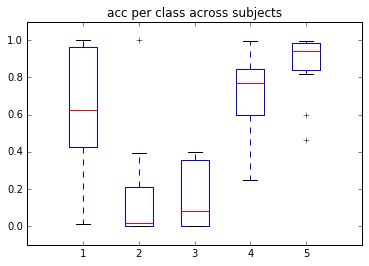

In [12]:
plt.boxplot(np.asarray(acc_class_subj))
plt.title('acc per class across subjects')
plt.axis([0,6,-0.1,1.1])
plt.show

### MIX Approach

Train a forest with SER, another with STRUT and use mix to compute final prediction

In [13]:
import SERfuncs

In [132]:
#train forest w SER
SERacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with SER
STRUTacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with STRUT
MIXacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with MIX
MIXmaxacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with MIX

k = 0
cmat_subj = [] #confusion matrix for each subject (a list)
acc_class_subj = [] #accuracy per class for each subject

#train forest on healthy (Source)
Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array
RF = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
RF = RF.fit(Xtrain,ytrain)

for s in PatientCodes:
    #loop through target sessions (use one as target)
    #for session in range(4):
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient in test

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    #predicting using only source data
    ypred = RF.predict(Xtest)
    #correct = sum(ypred == ytest)
    #SOacc_all[k,session] = correct/len(ytest)

    #balanced accuracy (Source only)
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    SOacc[k] = acc_c/len(np.unique(ytest))

    #***SER*** combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=5) #refine RF on current data (C is the # of classes on the source)
    ypred = np.asarray(map(lambda x:SERfuncs.forest_classify_ensemble(expRF,x),Xtest))
    
    #correct = sum(ypred == ytest)
    #SERacc_all[k,session] = correct/len(ytest)
    
    #balanced accuracy SER
    acc_c = 0
    acc_class = np.zeros(5) #the accuracy per class
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    SERacc[k] = acc_c/len(np.unique(ytest))

    
    #***STRUT*** combining source w target data
    STRUT_RF = STRUT(Xtrain,ytrain,Xtarget,ytarget,n_trees=50,verbos = False)
    ypred = np.asarray(map(lambda x:forest_classify_ensemble(STRUT_RF,x),Xtest))

    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    STRUTacc[k]=acc_c/len(np.unique(ytest))
    
    #*** MIX ****
    #Posteriors from SER and STRUT
    ypredMIX = np.empty(len(ytest))
    for p in range(len(ytest)):
        PSER = SERfuncs.forest_posterior(expRF,Xtest[p]).mean(axis=0)
        PSTRUT = SERfuncs.forest_posterior(STRUT_RF,Xtest[p]).mean(axis=0)
        PMIX = np.array((PSER,PSTRUT)) 
        ypredMIX[p] = np.argmax(PMIX.mean(axis=0))
        
    #balanced accuracy MIX
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypredMIX[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    MIXacc[k]=acc_c/len(np.unique(ytest))
    

    print 'Test on Patient %s,  '%s
    print '# of classes in test = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))
    print 'Source Only={:.2f}, Target Only={:.2f}, SER={:.2f}, STRUT={:.2f}, MIX={:.2f}'.format(SOacc[k],TOacc[k],SERacc[k],STRUTacc[k],MIXacc[k])
    
    k = k+1

print '\nmean Acc - Source only = %s'%SOacc.mean()
print 'mean Acc - Target only = %s'%TOacc.mean()
print 'mean Acc - SER = %s'%SERacc.mean()
print 'mean Acc - STRUT = %s'%STRUTacc.mean()
print 'mean Acc - MIX = %s'%MIXacc.mean()

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:267: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Test on Patient 1,  
# of classes in test = 5
Source samples = 8375, Target samples = 390, Test samples = 1288
Source Only=0.44, Target Only=0.72, SER=0.64, STRUT=0.51, MIX=0.64, MIXmax=0.00
Test on Patient 2,  
# of classes in test = 5
Source samples = 8375, Target samples = 467, Test samples = 991
Source Only=0.37, Target Only=0.45, SER=0.42, STRUT=0.45, MIX=0.51, MIXmax=0.00
Test on Patient 5,  
# of classes in test = 5
Source samples = 8375, Target samples = 415, Test samples = 1358
Source Only=0.49, Target Only=0.57, SER=0.59, STRUT=0.54, MIX=0.64, MIXmax=0.00
Test on Patient 6,  
# of classes in test = 5
Source samples = 8375, Target samples = 881, Test samples = 2035
Source Only=0.54, Target Only=0.65, SER=0.61, STRUT=0.41, MIX=0.60, MIXmax=0.00
Test on Patient 8,  
# of classes in test = 3
Source samples = 8375, Target samples = 354, Test samples = 856
Source Only=0.36, Target Only=0.76, SER=0.77, STRUT=0.86, MIX=0.86, MIXmax=0.00
Test on Patient 11,  
# of classes in test = 5


In [142]:
np.vstack((SOacc,TOacc,MIXacc)).T

array([[ 0.43828465,  0.72023703,  0.63862524],
       [ 0.37432512,  0.44937952,  0.51200345],
       [ 0.48991545,  0.57276063,  0.64186353],
       [ 0.5433169 ,  0.64987853,  0.60285796],
       [ 0.35844572,  0.75507849,  0.85577584],
       [ 0.52180158,  0.49169397,  0.53045469],
       [ 0.50376563,  0.45515268,  0.64836612],
       [ 0.49598798,  0.84060313,  0.70418798],
       [ 0.52788283,  0.58782884,  0.53523815],
       [ 0.67723433,  0.8640516 ,  0.84397413]])

<function matplotlib.pyplot.show>

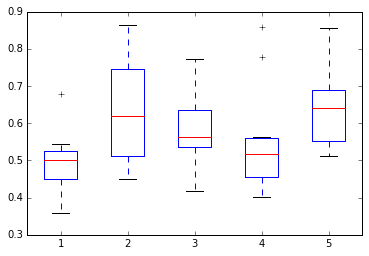

In [134]:
plt.boxplot([SOacc,TOacc,SERacc,STRUTacc,MIXacc])
plt.show

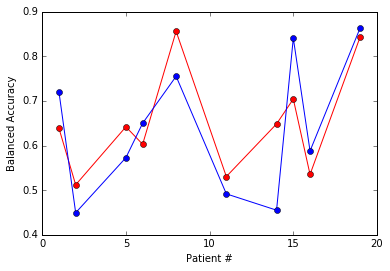

In [135]:
#IG ONLY
plt.figure(1)
plt.plot(PatientCodes,MIXacc,'ro-',PatientCodes,TOacc,'bo-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')

## Train on Source (Healthy) + Target

In [110]:
XHealthy = HealthyData.select_columns(feature_cols).to_numpy()
yHealthy = HealthyData.select_columns(label_cols).to_numpy()
yHealthy = yHealthy.reshape(-1) #to squeeze last dimension and obtain a 1D array
SaTacc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    Xtrain = np.concatenate((XHealthy,Xtarget),axis=0)
    ytrain = np.concatenate((yHealthy,ytarget),axis=0)
    
    RF = RandomForestClassifier(n_estimators=50,random_state=0)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    SaTacc[k] = BAcc
    print 'Patient %s, BAcc = %s'%(s,SaTacc[k])
    k = k+1

print 'Mean BAcc using Source + Target = %s'%SaTacc.mean()

Patient 1, BAcc = 0.671907981581
Patient 2, BAcc = 0.482502667627
Patient 5, BAcc = 0.562882500202
Patient 6, BAcc = 0.634047174699
Patient 8, BAcc = 0.756756949733
Patient 11, BAcc = 0.531475746046
Patient 14, BAcc = 0.576864733997
Patient 15, BAcc = 0.717848903813
Patient 16, BAcc = 0.548351901592
Patient 19, BAcc = 0.754964349376
Mean BAcc using Source + Target = 0.623760290867


In [136]:
np.vstack((SOacc,TOacc,SaTacc,MIXacc)).T

array([[ 0.43828465,  0.72023703,  0.67190798,  0.63862524],
       [ 0.37432512,  0.44937952,  0.48250267,  0.51200345],
       [ 0.48991545,  0.57276063,  0.5628825 ,  0.64186353],
       [ 0.5433169 ,  0.64987853,  0.63404717,  0.60285796],
       [ 0.35844572,  0.75507849,  0.75675695,  0.85577584],
       [ 0.52180158,  0.49169397,  0.53147575,  0.53045469],
       [ 0.50376563,  0.45515268,  0.57686473,  0.64836612],
       [ 0.49598798,  0.84060313,  0.7178489 ,  0.70418798],
       [ 0.52788283,  0.58782884,  0.5483519 ,  0.53523815],
       [ 0.67723433,  0.8640516 ,  0.75496435,  0.84397413]])

# Classifier Specificity paper tests
* Note: Patients currently used are 1 2 5 6 8 11 14 15 16 19
* Current paper draft: Sessions 1,2,3 CBR are used for testing, Session 4 CBR as target
* **Impairment Specific**: is trained on all but one SCO and tested on the remaining CBR patient
* **Patient Specific**: is trained on all SCO data (for that patient) and tested on Sessions 1,2,3 of CBR for the same patients
* **Device-Specific**: trained using Leave One Session Out across sessions 1,2,3 of CBR data for that patient. That means the model is trained on Sessions 1,2 and tested on 3 (and then cycles through the combinations). Session 4 was left out for target data.

In [139]:
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19])

## Impairment specific model (Leave one subject out)

In [137]:
ISpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50,random_state=0)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    ISpec_acc[k] = BAcc
    print 'Patient {}, Impairment specific (SCO) model - BAcc = {:.2f}'.format(s,ISpec_acc[k])
    k = k+1

print 'Mean BAcc - Impairment Specific (SCO) = %s'%ISpec_acc.mean()    

Patient 1, Impairment specific (SCO) model - BAcc = 0.507901755815
Patient 2, Impairment specific (SCO) model - BAcc = 0.482980771915
Patient 5, Impairment specific (SCO) model - BAcc = 0.493355781113
Patient 6, Impairment specific (SCO) model - BAcc = 0.5412572619
Patient 8, Impairment specific (SCO) model - BAcc = 0.497811415757
Patient 11, Impairment specific (SCO) model - BAcc = 0.554825572392
Patient 14, Impairment specific (SCO) model - BAcc = 0.582125623729
Patient 15, Impairment specific (SCO) model - BAcc = 0.594080790826
Patient 16, Impairment specific (SCO) model - BAcc = 0.521982799416
Patient 19, Impairment specific (SCO) model - BAcc = 0.887332373509
Mean BAcc - Impairment Specific (SCO) = 0.566365414637


## Can we boost an impairment-specific model with the Device data?
Source: Other patients SCO data

Target: 1 session of CBR data from current patient

In [144]:
SOacc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)] 

    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50,random_state=0)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    
    #balanced accuracy - Source only (Impairment specific)
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)    
    SOacc[k] = acc_c/len(np.unique(ytest))
    
    #** SER - combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=Nclasses) #refine RF on current data (C is the # of classes on the source)
    
    #***STRUT*** combining source w target data
    STRUT_RF = STRUT(Xtrain,ytrain,Xtarget,ytarget,n_trees=50,verbos = False)
    ypred = np.asarray(map(lambda x:forest_classify_ensemble(STRUT_RF,x),Xtest))
    
    #*** MIX ****
    #Posteriors from SER and STRUT
    ypredMIX = np.empty(len(ytest))
    for p in range(len(ytest)):
        PSER = SERfuncs.forest_posterior(expRF,Xtest[p]).mean(axis=0)
        PSTRUT = SERfuncs.forest_posterior(STRUT_RF,Xtest[p]).mean(axis=0)
        PMIX = np.array((PSER,PSTRUT)) 
        ypredMIX[p] = np.argmax(PMIX.mean(axis=0))
        
    #balanced accuracy MIX
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypredMIX[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    MIXacc[k]=acc_c/len(np.unique(ytest))
    
    print 'Test on Patient %s,  '%s
    print '# of classes in test = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))
    print 'Source Only={:.2f}, Target Only={:.2f}, MIX={:.2f}'.format(SOacc[k],TOacc[k],MIXacc[k])
    
    k = k+1

print 'Mean BAcc - Impairment Specific only = %s'%SOacc.mean()    
print 'Mean BAcc - Target only = %s'%TOacc.mean()    
print 'Mean BAcc - Impairment Specific w MIX = %s'%MIXacc.mean()    

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:267: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Test on Patient 1,  
# of classes in test = 5
Source samples = 17471, Target samples = 390, Test samples = 1288
Source Only=0.51, Target Only=0.72, MIX=0.59
Test on Patient 2,  
# of classes in test = 5
Source samples = 17055, Target samples = 467, Test samples = 991
Source Only=0.48, Target Only=0.45, MIX=0.54
Test on Patient 5,  
# of classes in test = 5
Source samples = 16386, Target samples = 415, Test samples = 1358
Source Only=0.49, Target Only=0.57, MIX=0.63
Test on Patient 6,  
# of classes in test = 5
Source samples = 17383, Target samples = 881, Test samples = 2035
Source Only=0.54, Target Only=0.65, MIX=0.59
Test on Patient 8,  
# of classes in test = 5
Source samples = 16142, Target samples = 354, Test samples = 856
Source Only=0.50, Target Only=0.76, MIX=0.79
Test on Patient 11,  
# of classes in test = 5
Source samples = 17131, Target samples = 455, Test samples = 1253
Source Only=0.55, Target Only=0.49, MIX=0.57
Test on Patient 14,  
# of classes in test = 5
Source sampl

## Train on SCO and test on CBR (Patient Specific model) 

In [139]:
PSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] == s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50,random_state=0)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    PSpec_acc[k] = BAcc
    print 'Patient {}, Nclasses = {}, Personal model (Trained on SCO) - BAcc = {:.2f}'.format(s,Nclasses,PSpec_acc[k])
    k = k+1

print 'Mean BAcc - Patient Specific (SCO) = %s'%PSpec_acc.mean()    

Patient 1, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.72
Patient 2, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.55
Patient 5, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.65
Patient 6, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.58
Patient 8, Nclasses = 3, Personal model (Trained on SCO) - BAcc = 0.70
Patient 11, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.47
Patient 14, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.49
Patient 15, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.44
Patient 16, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.50
Patient 19, Nclasses = 3, Personal model (Trained on SCO) - BAcc = 0.73
Mean BAcc - Patient Specific (SCO) = 0.582592163993


## Train and test on CBR - Device specific model (CBR)
* Leave One Session Out of CBR 
* Keep out 1 session (#4) for target

In [141]:
DSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    data =  CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #keep out 1 session for target
    BAcc = 0
    for session in range(1,4):
                  
        test = data[data['Session'] == session]
        train = data[data['Session'] != session]
    
        Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

        Xtrain = train.select_columns(feature_cols).to_numpy()
        ytrain = train.select_columns(label_cols).to_numpy()
        ytrain = ytrain.reshape(-1)
        Xtest = test.select_columns(feature_cols).to_numpy()
        ytest = test.select_columns(label_cols).to_numpy()
        ytest = ytest.reshape(-1)

        RF = RandomForestClassifier(n_estimators=50,random_state=0)
        RF = RF.fit(Xtrain,ytrain)
        ypred = RF.predict(Xtest)
        #acc = sum(ypred == ytest)/len(ytest)
        #balanced accuracy
        acc_c = 0
        for c in np.unique(ytest):
            i = ytest == c
            correct = ypred[i] == ytest[i]
            acc_c += sum(correct)/len(correct)

        BAcc += acc_c/len(np.unique(ytest)) #for current session
        
    DSpec_acc[k] = BAcc/3 #the CV BAcc on 3 session 
    print 'Patient {}, Device Specific model - BAcc = {:.2f}'.format(s,DSpec_acc[k])
    k = k+1

print 'Mean BAcc - Device Specific (CBR) = %s'%DSpec_acc.mean()    

Patient 1, Device Specific model - BAcc = 0.82
Patient 2, Device Specific model - BAcc = 0.67
Patient 5, Device Specific model - BAcc = 0.64
Patient 6, Device Specific model - BAcc = 0.61
Patient 8, Device Specific model - BAcc = 0.86
Patient 11, Device Specific model - BAcc = 0.69
Patient 14, Device Specific model - BAcc = 0.84
Patient 15, Device Specific model - BAcc = 0.81
Patient 16, Device Specific model - BAcc = 0.70
Patient 19, Device Specific model - BAcc = 0.76
Mean BAcc - Device Specific (CBR) = 0.740142236182


## Source: Patient SCO data (4 sessions); Target: Patient CBR data (session 4)

In [154]:
SOacc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] == s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)] 

    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50,random_state=0)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    
    #balanced accuracy - Source only (Impairment specific)
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)    
    SOacc[k] = acc_c/len(np.unique(ytest))
    
    #** SER - combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=Nclasses) #refine RF on current data (C is the # of classes on the source)
    
    #***STRUT*** combining source w target data
    STRUT_RF = STRUT(Xtrain,ytrain,Xtarget,ytarget,n_trees=50,verbos = False)
    ypred = np.asarray(map(lambda x:forest_classify_ensemble(STRUT_RF,x),Xtest))
    
    #*** MIX ****
    #Posteriors from SER and STRUT
    ypredMIX = np.empty(len(ytest))
    for p in range(len(ytest)):
        PSER = SERfuncs.forest_posterior(expRF,Xtest[p]).mean(axis=0)
        PSTRUT = SERfuncs.forest_posterior(STRUT_RF,Xtest[p]).mean(axis=0)
        PMIX = np.array((PSER,PSTRUT)) 
        ypredMIX[p] = np.argmax(PMIX.mean(axis=0))
        
    #balanced accuracy MIX
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypredMIX[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    MIXacc[k]=acc_c/len(np.unique(ytest))
    
    print 'Test on Patient %s,  '%s
    print '# of classes in test = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))
    print 'Source Only={:.2f}, Target Only={:.2f}, MIX={:.2f}'.format(SOacc[k],TOacc[k],MIXacc[k])
    
    k = k+1

print 'Mean BAcc - Patient Specific only = %s'%SOacc.mean()    
print 'Mean BAcc - Target (CBR) only = %s'%TOacc.mean()    
print 'Mean BAcc - Patient Specific w MIX = %s'%MIXacc.mean()    

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:267: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Test on Patient 1,  
# of classes in test = 5
Source samples = 1291, Target samples = 390, Test samples = 1288
Source Only=0.72, Target Only=0.72, MIX=0.73
Test on Patient 2,  
# of classes in test = 5
Source samples = 1707, Target samples = 467, Test samples = 991
Source Only=0.55, Target Only=0.45, MIX=0.51
Test on Patient 5,  
# of classes in test = 5
Source samples = 2376, Target samples = 415, Test samples = 1358
Source Only=0.65, Target Only=0.57, MIX=0.65
Test on Patient 6,  
# of classes in test = 5
Source samples = 1379, Target samples = 881, Test samples = 2035
Source Only=0.58, Target Only=0.65, MIX=0.66
Test on Patient 8,  
# of classes in test = 5
Source samples = 2620, Target samples = 354, Test samples = 856
Source Only=0.70, Target Only=0.76, MIX=0.74
Test on Patient 11,  
# of classes in test = 5
Source samples = 1631, Target samples = 455, Test samples = 1253
Source Only=0.47, Target Only=0.49, MIX=0.49
Test on Patient 14,  
# of classes in test = 5
Source samples = 1